#### Data science Nigeria 2019 Challenge: Prevision d'assurance.
En tant qu'analyste principal des données il s'agit de construire un modèle prédictif afin de déterminer si un batiment fera l'objet d'une reclamation d'assurance pendant une certaine période ou non.
Il s'agit de prédire la probabilité d'avoir au moins un sinistre sur le batiment. Le modèle sera basé sur les caracteristiques du batiment.

In [219]:
# Importons les differentes librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [4]:
# Affichons l'ensemble de la base de données utilisée
data=pd.read_csv('train_data.csv')
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [5]:
# Ensemble d'informations sur les données.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [8]:
# Détectons le nombre de lignes et le nombre de colones.
data.shape
# Notre dataset contient 7160 lignes et 14 colones.

(7160, 14)

In [15]:
# Identifions le tpe de chaque variable presente dans le dataset
data.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [17]:
# Identifions le tpe de chaque variable presente dans le dataset
data.dtypes.value_counts()
# Notre dataset contient 7 variables de type object,4 variables de type int64 et 3 variables de tpe float64


object     7
int64      4
float64    3
dtype: int64

In [19]:
# Identification des valeurs manquantes
data.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

Les variables contenant des valeurs manquantes sont :

Building Dimension: 106.

Date_of_Occupancy: 508.

Geo_Code : 102.

<AxesSubplot:xlabel='Claim', ylabel='Count'>

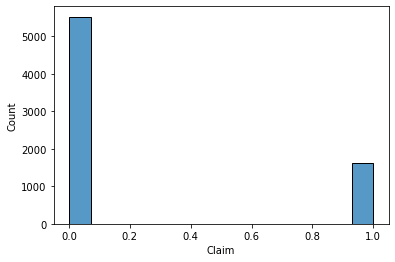

In [22]:
# Visualisation de la variable à predire :Claim
sns.histplot(data['Claim'])
#Le nombre de reclamation d'assurance(1.0) est plus petit que le nombre de personnes n'aant reclamé aucune assurance.(0.0)

###### VISUALISATION DE L'ENSEMBLE DES VARIABLES DE LA BASE DE DONNEES.

In [23]:
data.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residential', ylabel='count'>

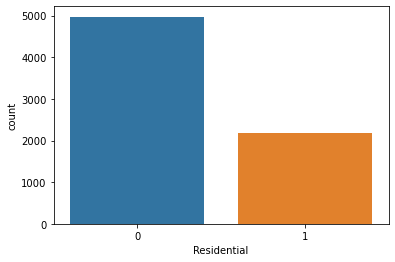

In [25]:
#variable Residential
sns.countplot(data['Residential'])

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Building_Painted', ylabel='count'>

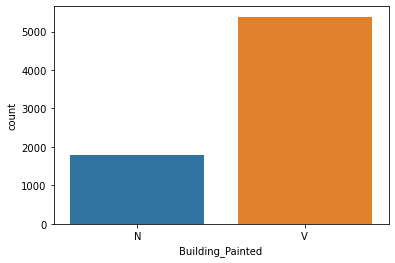

In [26]:
sns.countplot(data['Building_Painted'])

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Building_Type', ylabel='count'>

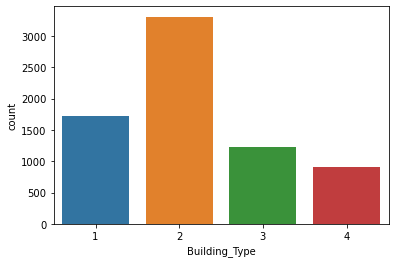

In [27]:
sns.countplot(data['Building_Type'])

<AxesSubplot:xlabel='Garden', ylabel='count'>

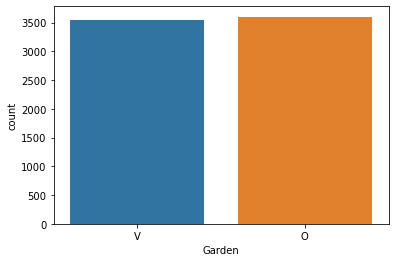

In [29]:
sns.countplot(data['Garden'])

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Claim', ylabel='Residential'>

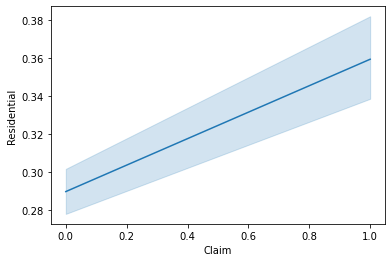

In [31]:
sns.lineplot(data['Claim'],data['Residential'])

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Building_Type', ylabel='Claim'>

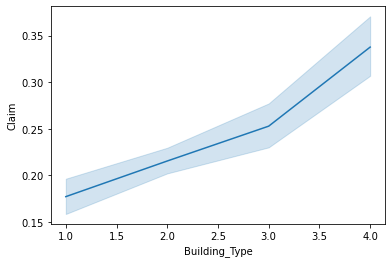

In [34]:
sns.lineplot(data['Building_Type'],data['Claim'])

###### Elimination des variables manquantes dans le dataset

<AxesSubplot:>

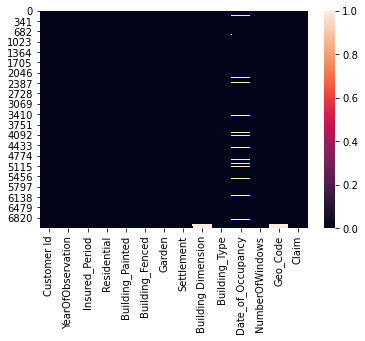

In [42]:
# Visualisation des variables manquantes.

sns.heatmap(data.isna())

In [48]:
# Nous supprimons les variables manquantes dans le dataset.

data=data.dropna(axis=0)
data.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

#### Encodage des variables 

In [52]:
# Affichons l'ensemble des valeurs presentes dans la variable Building_Painted
data['Building_Painted'].unique()


array(['N', 'V'], dtype=object)

In [53]:
# Encodage de la variable Building_Painted
le=LabelEncoder()
data['Building_Painted']=le.fit_transform(data['Building_Painted'])
data['Building_Painted']

<ipython-input-53-6252af904d96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Building_Painted']=le.fit_transform(data['Building_Painted'])


0       0
1       1
2       0
3       1
4       1
       ..
7053    1
7054    0
7055    0
7056    0
7057    0
Name: Building_Painted, Length: 6543, dtype: int32

In [55]:
# Affichons l'ensemble des valeurs presentes dans la variable Building_Fenced
data['Building_Fenced'].unique()


array(['V', 'N'], dtype=object)

In [56]:
data['Building_Fenced']

0       V
1       N
2       V
3       V
4       N
       ..
7053    N
7054    V
7055    V
7056    V
7057    V
Name: Building_Fenced, Length: 6543, dtype: object

In [57]:
# Encodage de la variable Building_Fenced
le=LabelEncoder()
data['Building_Fenced']=le.fit_transform(data['Building_Fenced'])
data['Building_Fenced']

<ipython-input-57-2b507a567b19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Building_Fenced']=le.fit_transform(data['Building_Fenced'])


0       1
1       0
2       1
3       1
4       0
       ..
7053    0
7054    1
7055    1
7056    1
7057    1
Name: Building_Fenced, Length: 6543, dtype: int32

In [58]:
# Affichons l'ensemble des valeurs presentes dans la variable Garden
data['Garden'].unique()


array(['V', 'O'], dtype=object)

In [59]:
data['Garden']

0       V
1       O
2       V
3       V
4       O
       ..
7053    O
7054    V
7055    V
7056    V
7057    V
Name: Garden, Length: 6543, dtype: object

In [60]:
# Encodage de la variable Garden
le=LabelEncoder()
data['Garden']=le.fit_transform(data['Garden'])
data['Garden']

<ipython-input-60-06e1617011f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Garden']=le.fit_transform(data['Garden'])


0       1
1       0
2       1
3       1
4       0
       ..
7053    0
7054    1
7055    1
7056    1
7057    1
Name: Garden, Length: 6543, dtype: int32

In [61]:
# Affichons l'ensemble des valeurs presentes dans la variable Settlement
data['Settlement'].unique()

array(['U', 'R'], dtype=object)

In [62]:
data['Settlement']

0       U
1       R
2       U
3       U
4       R
       ..
7053    R
7054    U
7055    U
7056    U
7057    U
Name: Settlement, Length: 6543, dtype: object

In [63]:
# Encodage de la variable Settlement
le=LabelEncoder()
data['Settlement']=le.fit_transform(data['Settlement'])
data['Settlement']

<ipython-input-63-5553ffb569f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Settlement']=le.fit_transform(data['Settlement'])


0       1
1       0
2       1
3       1
4       0
       ..
7053    0
7054    1
7055    1
7056    1
7057    1
Name: Settlement, Length: 6543, dtype: int32

In [71]:
# Affichons l'ensemble des valeurs présentes dans la variable NumberOfWindows
data['NumberOfWindows'].unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [72]:
(data['NumberOfWindows']=='   .').value_counts()

False    3602
True     2941
Name: NumberOfWindows, dtype: int64

In [73]:
data['NumberOfWindows']

0          .
1          4
2          .
3          .
4          3
        ... 
7053       3
7054       .
7055       .
7056       .
7057       .
Name: NumberOfWindows, Length: 6543, dtype: object

In [74]:
# Remplacons les valeurs de la variable NumberOfWindows par des valers numériques correspondantes.
data['NumberOfWindows']=data['NumberOfWindows'].replace(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],[0,4,3,2,5,10,6,7,9,8,1])
data['NumberOfWindows']

0       0
1       4
2       0
3       0
4       3
       ..
7053    3
7054    0
7055    0
7056    0
7057    0
Name: NumberOfWindows, Length: 6543, dtype: int64

In [76]:
# Affichons l'ensemble des variables présentes dans la variable Geo_Code
data['Geo_Code'].unique()

array(['1053', '1143', '1160', ..., '2B050', '2B096', '2B353'],
      dtype=object)

In [77]:
data['Geo_Code']

0        1053
1        1053
2        1053
3        1053
4        1053
        ...  
7053    2B042
7054    2B050
7055    2B050
7056    2B096
7057    2B353
Name: Geo_Code, Length: 6543, dtype: object

In [98]:
# Remplacons les valeurs de la variable Geo_Code par des valers numériques correspondantes.
data['Geo_Code']=data['Geo_Code'].astype(int)
# La variable Geo_Code contient des lettres dans certaines valeurs.Il n'est pas possible de les convertir en entier.
# Cette valers ne sera pas donc tiliser lors de la prediction por l'assurance.

ValueError: invalid literal for int() with base 10: '2A004'

In [103]:
#Identifions la correlation entre les differentes variables.
data.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
YearOfObservation,1.000000,0.031436,-0.034287,0.062154,-0.112921,-0.112771,-0.112771,0.007467,0.007258,-0.027737,0.094603,-0.017600
Insured_Period,0.031436,1.000000,-0.043441,-0.012341,0.009032,0.008923,0.008923,-0.005724,-0.004463,-0.001332,-0.005126,0.101631
Residential,-0.034287,-0.043441,1.000000,-0.025969,-0.118547,-0.118352,-0.118352,0.069934,0.318112,-0.039521,0.164157,0.066630
Building_Painted,0.062154,-0.012341,-0.025969,1.000000,-0.630711,-0.630907,-0.630907,0.093026,-0.041331,-0.098687,0.533729,0.036131
Building_Fenced,-0.112921,0.009032,-0.118547,-0.630711,1.000000,0.999691,0.999691,-0.117076,-0.043149,0.176156,-0.847600,-0.049142
Garden,-0.112771,0.008923,-0.118352,-0.630907,0.999691,1.000000,1.000000,-0.117022,-0.043095,0.176070,-0.848547,-0.049704
Settlement,-0.112771,0.008923,-0.118352,-0.630907,0.999691,1.000000,1.000000,-0.117022,-0.043095,0.176070,-0.848547,-0.049704
Building Dimension,0.007467,-0.005724,0.069934,0.093026,-0.117076,-0.117022,-0.117022,1.000000,0.017592,0.207313,0.280696,0.298525
Building_Type,0.007258,-0.004463,0.318112,-0.041331,-0.043149,-0.043095,-0.043095,0.017592,1.000000,-0.149504,0.140838,0.114202
Date_of_Occupancy,-0.027737,-0.001332,-0.039521,-0.098687,0.176156,0.176070,0.176070,0.207313,-0.149504,1.000000,-0.158840,0.018604


In [106]:
# Assemblons l'ensemble des variables qui seront utilisées lors de la construction du modèle.
data_user=data.drop(['Customer Id', 'YearOfObservation','Geo_Code'],axis=1)
data_user


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
0,1.000000,0,0,1,1,1,290.0,1,1960.0,0,0
1,1.000000,0,1,0,0,0,490.0,1,1850.0,4,0
2,1.000000,0,0,1,1,1,595.0,1,1960.0,0,0
3,1.000000,0,1,1,1,1,2840.0,1,1960.0,0,0
4,1.000000,0,1,0,0,0,680.0,1,1800.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
7053,0.153425,0,1,0,0,0,2444.0,3,1985.0,3,0
7054,1.000000,0,0,1,1,1,1017.0,3,1980.0,0,0
7055,1.000000,0,0,1,1,1,1017.0,3,1980.0,0,0
7056,1.000000,0,0,1,1,1,400.0,3,1960.0,0,0


In [147]:
# Preparons notre base de donnée pour entrainer les differents modèles.
x=data_user.drop(['Claim'],axis=1)
y=data_user['Claim']

In [149]:
#Partageons la base de données en deux parties.
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=1)

#### Encodage des données du testset.

In [110]:
# importons la base de données d testset
data_test=pd.read_csv('test_data.csv')

# Encodage de la variable Building_Painted
le=LabelEncoder()
data_test['Building_Painted']=le.fit_transform(data_test['Building_Painted'])

# Encodage de la variable Building_Fenced
le=LabelEncoder()
data_test['Building_Fenced']=le.fit_transform(data_test['Building_Fenced'])


# Encodage de la variable Garden
le=LabelEncoder()
data_test['Garden']=le.fit_transform(data_test['Garden'])

# Encodage de la variable Settlement
le=LabelEncoder()
data_test['Settlement']=le.fit_transform(data_test['Settlement'])

# Remplacons les valeurs de la variable NumberOfWindows par des valers numériques correspondantes.
data_test['NumberOfWindows']=data_test['NumberOfWindows'].replace(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],[0,4,3,2,5,10,6,7,9,8,1])

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,1,0,0,0,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,1,0,0,0,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,1,1,1,1,790.0,1,1960.0,0,3310
3,H7493,2014,1.000000,0,1,0,0,0,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,1,0,0,0,1405.0,1,2004.0,3,3321


In [150]:

x_train

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows
6285,1.0,1,1,0,0,0,780.0,3,1950.0,1
1748,1.0,0,1,1,1,1,400.0,2,1960.0,0
5020,1.0,1,0,1,1,1,1650.0,4,1960.0,0
2669,1.0,0,1,0,0,0,1461.0,1,1960.0,6
3934,0.0,0,0,1,1,1,3473.0,2,1980.0,0
...,...,...,...,...,...,...,...,...,...,...
938,1.0,0,1,1,1,1,3600.0,1,1960.0,0
5620,1.0,0,1,0,0,0,200.0,2,1988.0,2
4245,1.0,0,1,0,0,0,450.0,2,1970.0,3
242,1.0,0,1,0,0,0,1370.0,4,2008.0,5


In [151]:
y_train

6285    0
1748    0
5020    0
2669    0
3934    0
       ..
938     0
5620    0
4245    0
242     0
5584    0
Name: Claim, Length: 5234, dtype: int64

In [152]:
x_val

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows
4208,1.0,1,1,0,0,0,750.0,2,2008.0,3
2416,1.0,0,0,1,1,1,600.0,2,1988.0,0
6053,1.0,0,1,1,1,1,2880.0,1,1980.0,0
3556,1.0,1,1,0,0,0,770.0,2,1960.0,4
5780,1.0,0,1,0,0,0,915.0,2,1988.0,2
...,...,...,...,...,...,...,...,...,...,...
3719,1.0,0,1,0,0,0,3147.0,2,1960.0,5
6844,1.0,1,1,0,0,0,2700.0,3,1965.0,7
2149,1.0,1,1,0,0,0,790.0,2,1991.0,3
3558,1.0,0,0,1,1,1,3500.0,2,1988.0,0


#### Entrainement et evaluation des algorithmes utilisés.

In [220]:
# Definissons la fonction evaluation_model


def evaluation_model(model):
    
    
    model.fit(x_train,y_train)
    
    y_pred=model.predict(x_val)
    
    print(confusion_matrix(y_val,y_pred))
    
    print(classification_report(y_val,y_pred))
    
    N,train_score, val_score = learning_curve(model,x_train,y_train, cv=4,scoring='f1', 
                                              train_sizes=np.linspace(0.1,1,10))
                                            
    plt.figure(figsize=(12, 8))
    
    plt.plot(N,train_score.mean(axis=1), label='train score')
    
    plt.plot(N,val_score.mean(axis=1), label='validation score') 
    
    plt.legend()

In [221]:
# Algorithmes utilisés
SVC= SVC()
BernoulliNB=BernoulliNB()
LogisticRegression=LogisticRegression()
KNeighborsClassifier=KNeighborsClassifier()
AdaBoostClassifier=AdaBoostClassifier()

In [222]:
# Nous creons un dictionnaire qui regroupe tous les algorithmes utilisés.
dict_of_models={
    
    'BernoulliNB':BernoulliNB,
    'SVC':SVC,
    'LogisticRegression':LogisticRegression,
    'KNeighborsClassifier':KNeighborsClassifier,
    'AdaBoostClassifier':AdaBoostClassifier,
   
}

BernoulliNB
[[1007    0]
 [ 302    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1007
           1       0.00      0.00      0.00       302

    accuracy                           0.77      1309
   macro avg       0.38      0.50      0.43      1309
weighted avg       0.59      0.77      0.67      1309



C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
[[982  25]
 [269  33]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1007
           1       0.57      0.11      0.18       302

    accuracy                           0.78      1309
   macro avg       0.68      0.54      0.53      1309
weighted avg       0.74      0.78      0.71      1309

LogisticRegression
[[981  26]
 [264  38]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1007
           1       0.59      0.13      0.21       302

    accuracy                           0.78      1309
   macro avg       0.69      0.55      0.54      1309
weighted avg       0.74      0.78      0.72      1309



C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

KNeighborsClassifier
[[906 101]
 [235  67]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1007
           1       0.40      0.22      0.29       302

    accuracy                           0.74      1309
   macro avg       0.60      0.56      0.56      1309
weighted avg       0.70      0.74      0.71      1309

AdaBoostClassifier
[[951  56]
 [237  65]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1007
           1       0.54      0.22      0.31       302

    accuracy                           0.78      1309
   macro avg       0.67      0.58      0.59      1309
weighted avg       0.74      0.78      0.74      1309



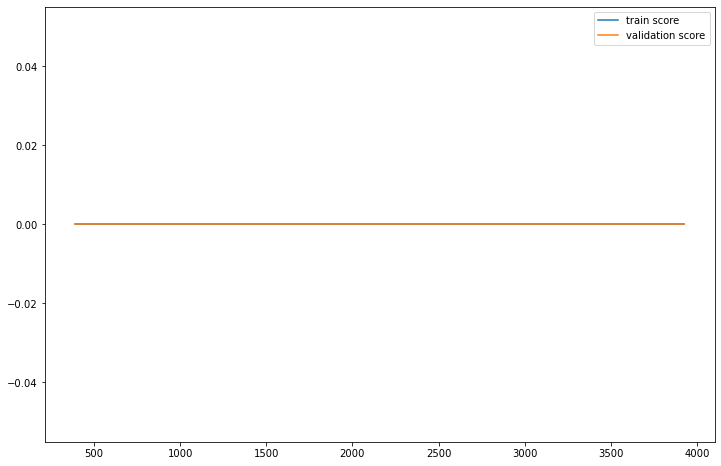

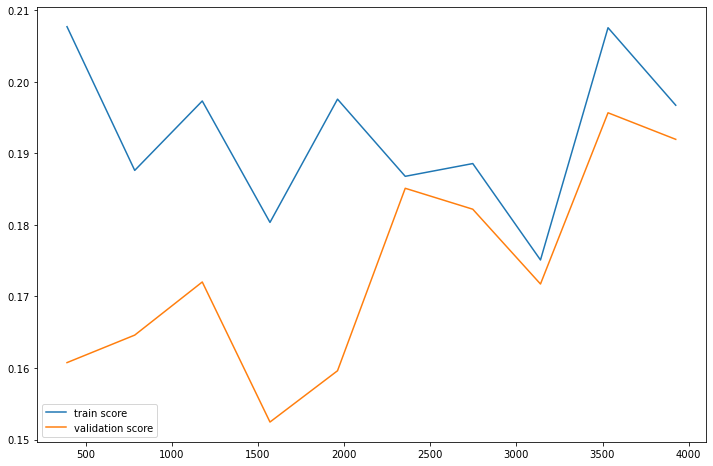

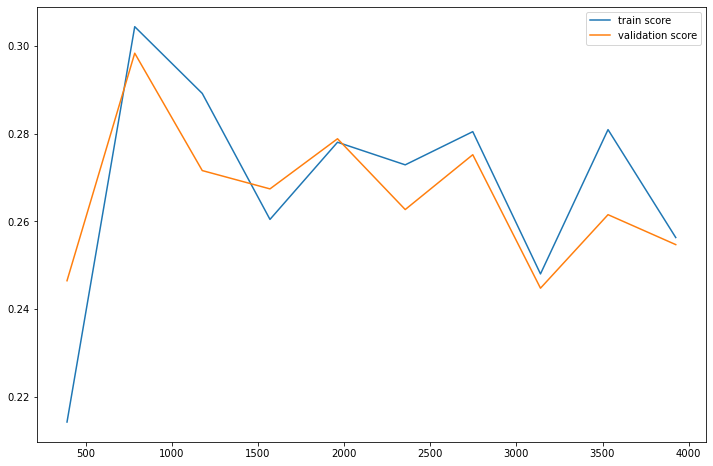

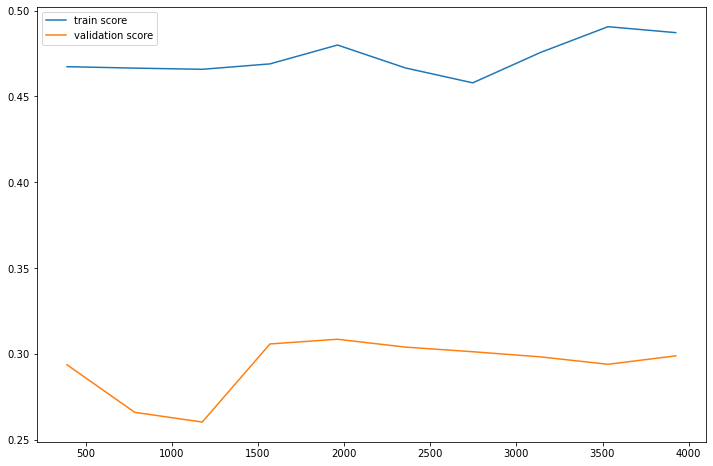

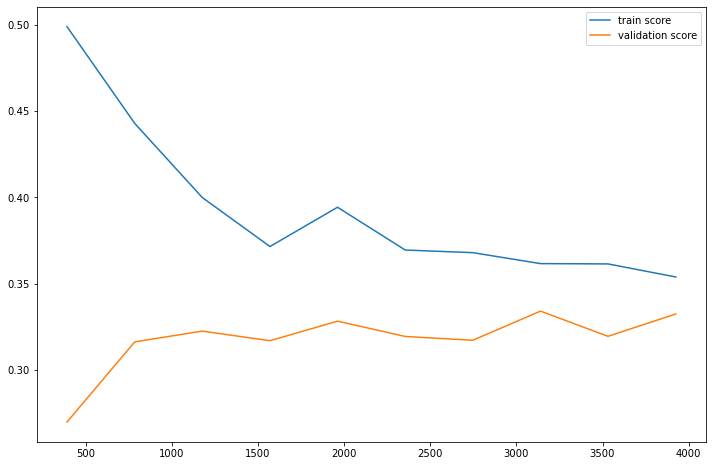

In [223]:
# Evaluation de chaque algorithme avec la fonction: evaluation_model.
for name, model  in dict_of_models.items():
    print(name)
    evaluation_model(model)

#### Globalement les modèles ayant les meillers performances:
###### KNeightborClassifier:
precision= 0.40; recall= 0.22 f1_score= 0.29
###### AdaboostClassifier:
precision= 0.54; recall= 0.22 f1_score= 0.31





#### Nous avons essayer par la suite, d'ameliorer les deux modèles précedents en tilisant le GRIDSEARCH CV pour prédire  la probabilitéd'avoir au moins un sinistre sur une maison.

### LE MEILLEUR MODELE POUR DETECTER UN SINISTRE SUR BATIMENT EST : ADABOOSTCLASSIFIER   

###### precision= 0.54; recall= 0.22 f1_score= 0.31

In [218]:
# knn=KNeighborsClassifier()
# hyper_params_knn={'n_neighbors':[3,4,5,6,7,8], 
#                            'p':[1,2,3,4],
                           
#               }
# grid=GridSearchCV(knn, hyper_params_knn,cv=5)
# grid.fit(x_train,y_train)
# print("Meilleurs parametres",grid.best_params_)
